# Decision Tree Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [9]:
df = pd.read_csv('Position_Salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [10]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

## Training the Decision Tree Regression model on the whole dataset

In [11]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)

DecisionTreeRegressor(random_state=0)

## Predicting a new result

In [7]:
regressor.predict([[6.5]])

array([150000.])

## Visualising the Decision Tree Regression results (higher resolution)

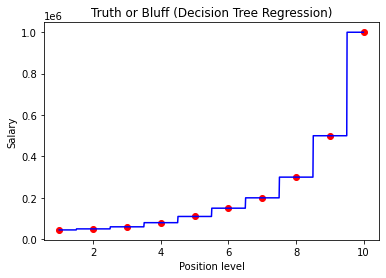

In [8]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

<hr>

In [24]:
# Import the necessary modules and libraries
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [48]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

pd.DataFrame({'position': X.ravel(),
              'value': y}).to_pickle("tree_data.pkl")

In [49]:
df = pd.read_pickle("tree_data.pkl")
df.head()

X = df.position
y = df.value

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                     X, y, test_size=0.33, random_state=42)

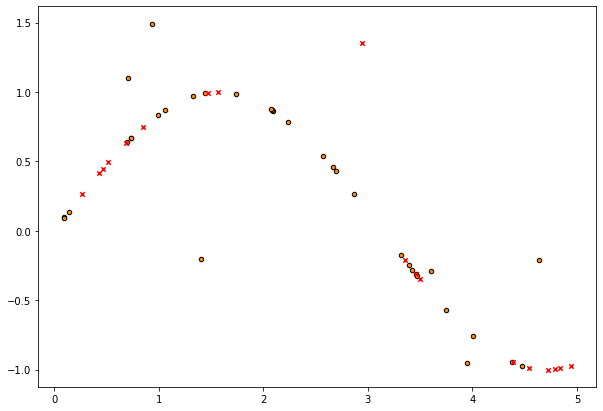

In [69]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=20, edgecolor="black", c="darkorange", label="data")
plt.scatter(X_test, y_test, s=20, c='red', label="data", marker='x')
plt.show()

In [70]:
# Fit regression model
regr_0 = DecisionTreeRegressor()
regr_2 = DecisionTreeRegressor(max_depth=2)
regr_5 = DecisionTreeRegressor(max_depth=5)

regr_0.fit(X_train, y_train)
regr_2.fit(X_train, y_train)
regr_5.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [71]:
# Predict
X_test_l = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_0 = regr_0.predict(X_test_l)
y_2 = regr_2.predict(X_test_l)
y_5 = regr_5.predict(X_test_l)

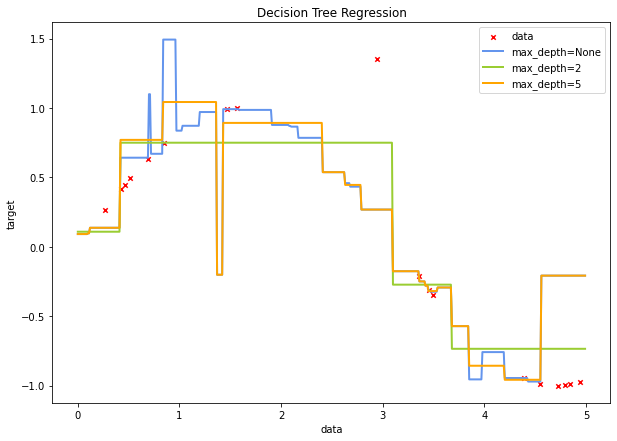

In [72]:
# Plot the results
plt.figure(figsize=(10, 7))
plt.scatter(X_test, y_test, s=20, c='red', marker='x', label="data")
plt.plot(X_test_l, y_0, color="cornflowerblue", label="max_depth=None", linewidth=2)
plt.plot(X_test_l, y_2, color="yellowgreen", label="max_depth=2", linewidth=2)
plt.plot(X_test_l, y_5, color="orange", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()